Machine Learning Project

Members:

Rashmi


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# read the csv file
admission_df = pd.read_csv('Admission_Predict_Ver1.1.csv')

In [ ]:
admission_df.head()


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
# Let's drop the serial no.
admission_df.drop('Serial No.', axis = 1, inplace = True)
admission_df


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


In [ ]:
# checking the null values
admission_df.isnull().sum()


GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [ ]:
# Check the dataframe information
admission_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [ ]:
# Statistical summary of the dataframe
admission_df.describe()


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [ ]:
# Grouping by University ranking
df_university = admission_df.groupby(by = 'University Rating').mean()
df_university

,GRE Score,TOEFL Score,SOP,LOR,CGPA,Research,Chance of Admit
University Rating,,,,,,,
1,304.911765,100.205882,1.941176,2.426471,7.798529,0.294118,0.562059
2,309.134921,103.444444,2.682540,2.956349,8.177778,0.293651,0.626111
3,315.030864,106.314815,3.308642,3.401235,8.500123,0.537037,0.702901
4,323.304762,110.961905,4.000000,3.947619,8.936667,0.780952,0.801619
5,327.890411,113.438356,4.479452,4.404110,9.278082,0.876712,0.888082


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f68c7957b90>,
      dtype=object)

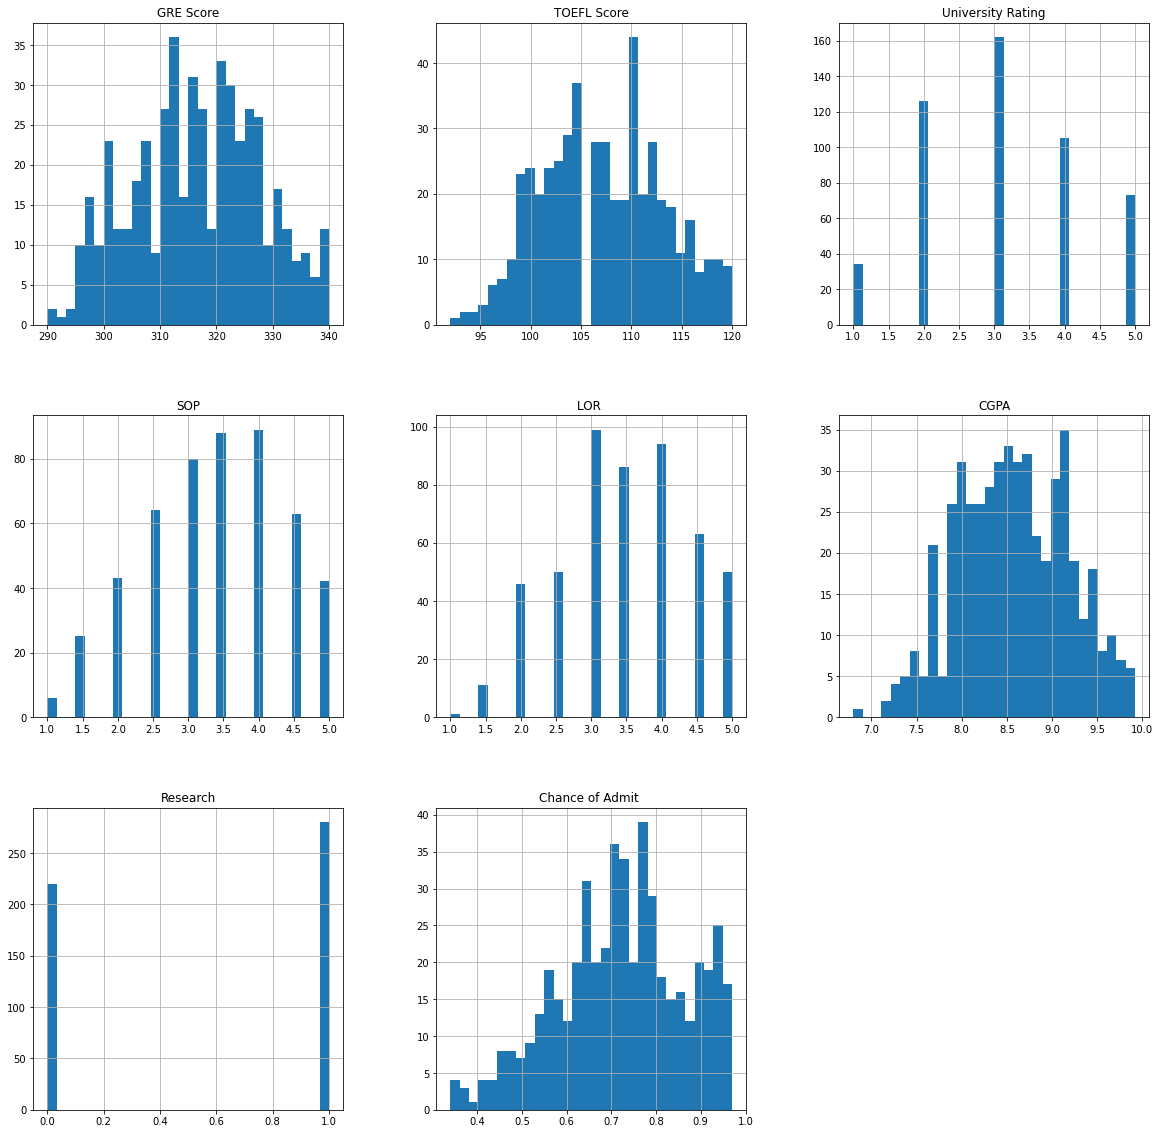

In [ ]:
admission_df.hist(bins = 30, figsize =(20,20))

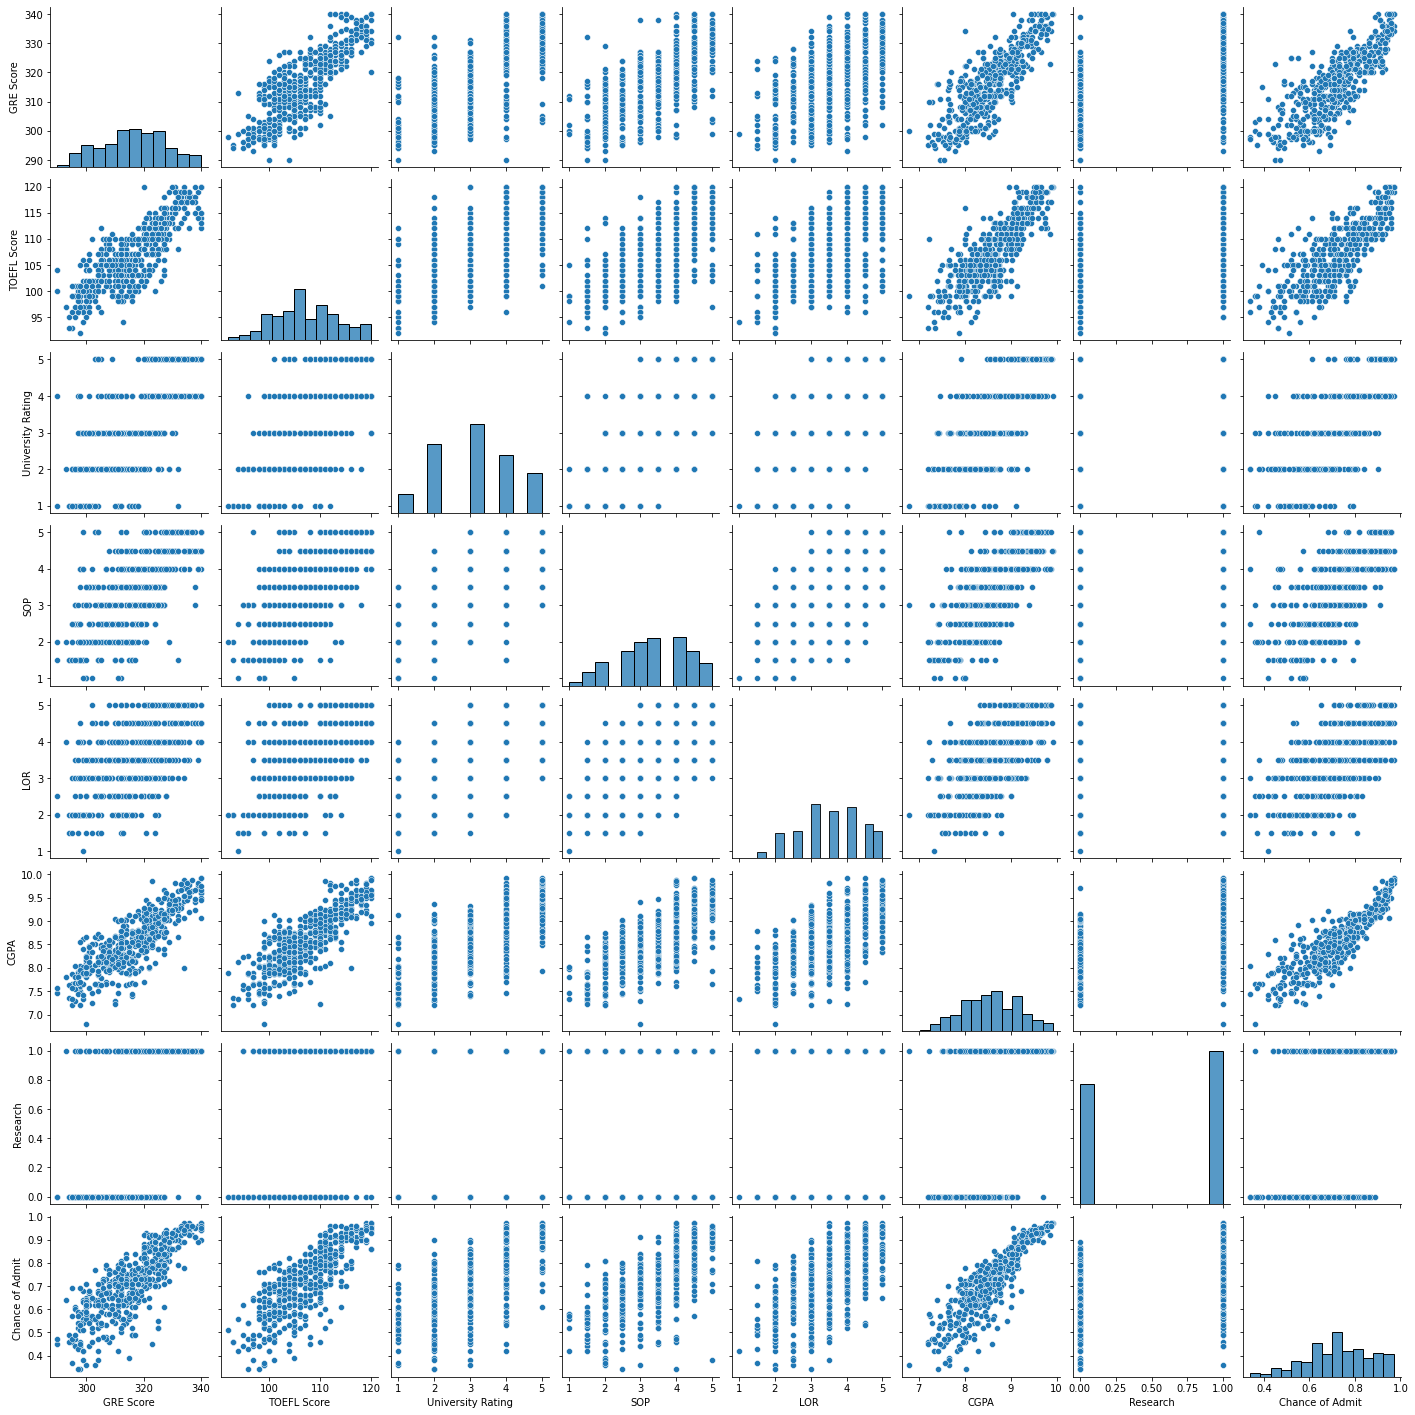

In [ ]:
sns.pairplot(admission_df)


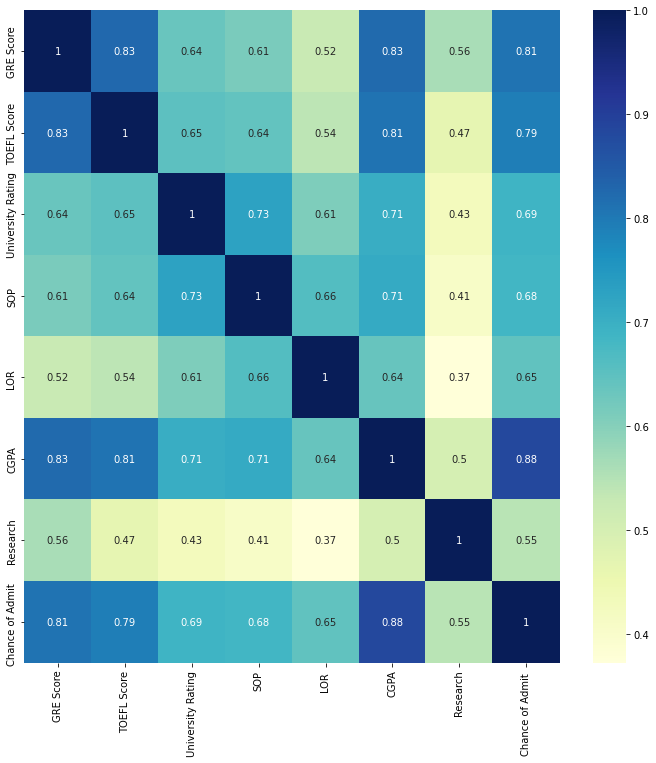

In [ ]:
corr_matrix = admission_df.corr()
plt.figure(figsize = (12,12))
sns.heatmap(corr_matrix , annot = True, cmap="YlGnBu")
plt.show()

In [ ]:
admission_df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [ ]:
X = admission_df.drop(columns = ['Chance of Admit '])



In [ ]:
y = admission_df['Chance of Admit ']


In [ ]:
X.shape

(500, 7)

In [ ]:
y.shape

(500,)

In [ ]:
y


0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit , Length: 500, dtype: float64

In [ ]:
X = np.array(X)
y = np.array(y)


In [ ]:
y = y.reshape(-1,1)
y.shape


(500, 1)

In [ ]:

# scaling the data before training the model
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scalar_x = StandardScaler()
X = scalar_x.fit_transform(X)


In [ ]:
scalar_y = StandardScaler()
y = scalar_y.fit_transform(y)

In [ ]:

# spliting the data in to test and train sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X , y , test_size=0.5)


**LINEAR REGRESSION**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score


In [ ]:

LinearRegression_model = LinearRegression()
LinearRegression_model.fit(X_train, y_train)


LinearRegression()

In [ ]:
y_pred = LinearRegression_model.predict(X_test)

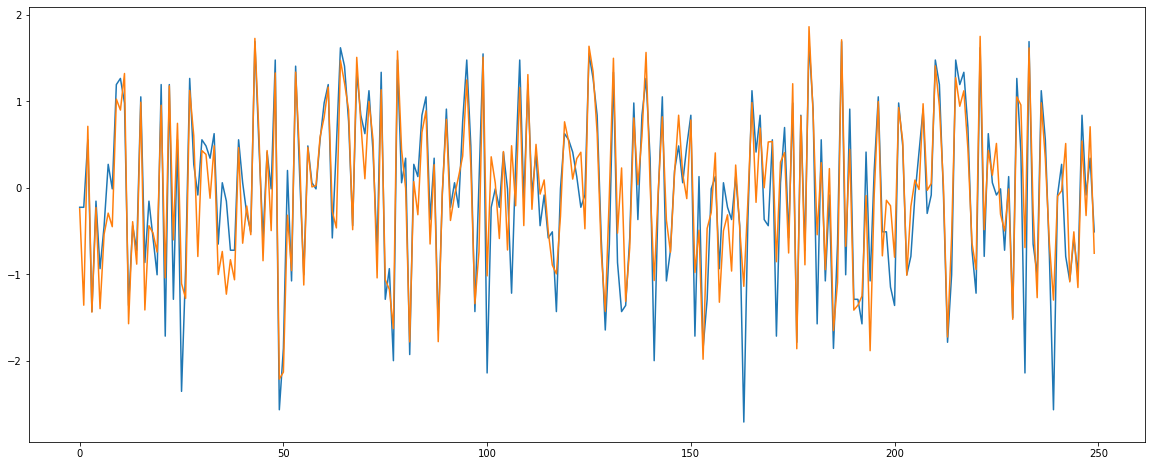

In [ ]:
from matplotlib import rcParams
rcParams['figure.figsize']=20,8
plt.plot(y_test)
plt.plot(y_pred)

In [ ]:
accuracy_LinearRegression = LinearRegression_model.score(X_test, y_test)
accuracy_LinearRegression

0.8060189050302291

**NEURAL NETWORKS**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam


In [ ]:
ANN_model = keras.Sequential()
ANN_model.add(Dense(50, input_dim = 7))
ANN_model.add(Activation('relu'))
ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dropout(0.5))
ANN_model.add(Dense(150))
ANN_model.add(Activation('relu'))
ANN_model.add(Dropout(0.5))
ANN_model.add(Dense(50))
ANN_model.add(Activation('linear'))
ANN_model.add(Dense(1))
ANN_model.compile(loss = 'mse', optimizer = 'adam')
ANN_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                400       
                                                                 
 activation (Activation)     (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 150)               7650      
                                                                 
 activation_1 (Activation)   (None, 150)               0         
                                                                 
 dropout (Dropout)           (None, 150)               0         
                                                                 
 dense_2 (Dense)             (None, 150)               22650     
                                                                 
 activation_2 (Activation)   (None, 150)               0

In [ ]:
ANN_model.compile(optimizer='Adam', loss='mean_squared_error')

In [ ]:
epochs_hist = ANN_model.fit(X_train, y_train, epochs = 100, batch_size = 20)

Epoch 1/100
13/13 [==============================] - 1s 4ms/step - loss: 0.6722
Epoch 2/100
13/13 [==============================] - 0s 3ms/step - loss: 0.4393
Epoch 3/100
13/13 [==============================] - 0s 4ms/step - loss: 0.3549
Epoch 4/100
13/13 [==============================] - 0s 3ms/step - loss: 0.3090
Epoch 5/100
13/13 [==============================] - 0s 3ms/step - loss: 0.3014
Epoch 6/100
13/13 [==============================] - 0s 3ms/step - loss: 0.2658
Epoch 7/100
13/13 [==============================] - 0s 3ms/step - loss: 0.2388
Epoch 8/100
13/13 [==============================] - 0s 4ms/step - loss: 0.2551
Epoch 9/100
13/13 [==============================] - 0s 3ms/step - loss: 0.2604
Epoch 10/100
13/13 [==============================] - 0s 4ms/step - loss: 0.2635
Epoch 11/100
13/13 [==============================] - 0s 3ms/step - loss: 0.2067
Epoch 12/100
13/13 [==============================] - 0s 4ms/step - loss: 0.2403
Epoch 13/100
13/13 [=================

In [ ]:
result = ANN_model.evaluate(X_test, y_test)
accuracy_ANN = 1 - result
print("Accuracy : {}".format(accuracy_ANN))

8/8 [==============================] - 0s 3ms/step - loss: 0.2803
Accuracy : 0.7196816504001617


In [ ]:
epochs_hist.history.keys()

dict_keys(['loss'])

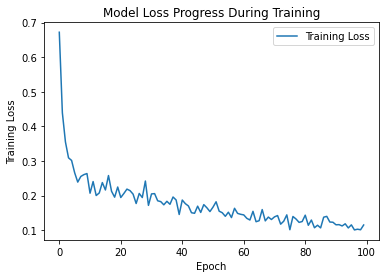

In [ ]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])


**DECISION TREE AND RANDOM FOREST**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
DecisionTree_model = DecisionTreeRegressor()
DecisionTree_model.fit(X_train,y_train)


DecisionTreeRegressor()

In [ ]:
accuracy_DecisionTree = DecisionTree_model.score(X_test,y_test)
accuracy_DecisionTree


0.47098342179659125

Random Forest Classification

In [ ]:
from sklearn.ensemble import RandomForestRegressor
RandomForest_model = RandomForestRegressor(n_estimators=100,max_depth=10)
RandomForest_model.fit(X_train,y_train)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(max_depth=10)

In [ ]:
accuracy_RandomForest = RandomForest_model.score(X_test,y_test)
accuracy_RandomForest

0.7714815134186287

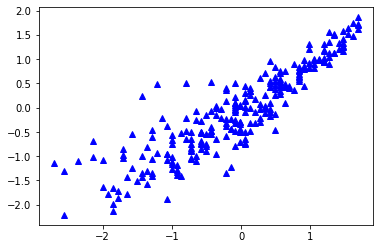

In [ ]:

y_predict = LinearRegression_model.predict(X_test)
plt.plot(y_test, y_predict, '^',color = 'b')


In [ ]:
y_predict_orig = scalar_y.inverse_transform(y_predict)
y_test_orig = scalar_y.inverse_transform(y_test)

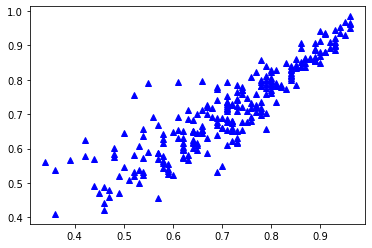

In [ ]:
plt.plot(y_test_orig,y_predict_orig,'^',color = 'b')

In [ ]:
k = X_test.shape[1]
n = len(X_test)
n


250

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt
RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

In [ ]:
print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =',adj_r2)

RMSE = 0.061 
MSE = 0.003697039133566072 
MAE = 0.043119079892106865 
R2 = 0.8060189050302291 
Adjusted R2 = 0.8004078816220126
